# Import The Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import random
plt.style.use('ggplot')
# from dython import nominal



from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, Normalizer
from sklearn.feature_selection import SelectKBest



# Import the data 

In [2]:
df= pd.read_csv(r'data\training_data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
columns_list = [x.lower() for x in list(df.columns)]
df.columns = columns_list

In [4]:
# shape of data
df.shape

(252000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 252000 non-null  int64 
 1   income             252000 non-null  int64 
 2   age                252000 non-null  int64 
 3   experience         252000 non-null  int64 
 4   married/single     252000 non-null  object
 5   house_ownership    252000 non-null  object
 6   car_ownership      252000 non-null  object
 7   profession         252000 non-null  object
 8   city               252000 non-null  object
 9   state              252000 non-null  object
 10  current_job_yrs    252000 non-null  int64 
 11  current_house_yrs  252000 non-null  int64 
 12  risk_flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [6]:
# rename the column married/single into marital_status
df.rename({'married/single':'marital_status'},axis=1, inplace=True)

In [7]:
df.describe()

,id,income,age,experience,current_job_yrs,current_house_yrs,risk_flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [8]:
# checking for null values 
df.isna().sum()

id                   0
income               0
age                  0
experience           0
marital_status       0
house_ownership      0
car_ownership        0
profession           0
city                 0
state                0
current_job_yrs      0
current_house_yrs    0
risk_flag            0
dtype: int64

# Data Preprocessing

In [9]:
df.nunique()

id                   252000
income                41920
age                      59
experience               21
marital_status            2
house_ownership           3
car_ownership             2
profession               51
city                    317
state                    29
current_job_yrs          15
current_house_yrs         5
risk_flag                 2
dtype: int64

In [10]:
# lets look into  state feature values 
df.state.unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [11]:
# removing extra symbols and convert words into lowercase
# https://stackoverflow.com/questions/34214139/python-keep-only-letters-in-string 
df['state'] = df['state'].apply(lambda x: re.sub('[^a-zA-Z]+', ' ',x))
df['state'] = df['state'].apply(lambda x: x.lower())

In [12]:
df.state.unique()

array(['madhya pradesh', 'maharashtra', 'kerala', 'odisha', 'tamil nadu',
       'gujarat', 'rajasthan', 'telangana', 'bihar', 'andhra pradesh',
       'west bengal', 'haryana', 'puducherry', 'karnataka',
       'uttar pradesh', 'himachal pradesh', 'punjab', 'tripura',
       'uttarakhand', 'jharkhand', 'mizoram', 'assam',
       'jammu and kashmir', 'delhi', 'chhattisgarh', 'chandigarh',
       'uttar pradesh ', 'manipur', 'sikkim'], dtype=object)

In [13]:
# if we observ the value uttar pradesh occured twice , containing the extra spaces which causing the extra unique value 
# lets fix this 
df['state'] = df['state'].str.strip()
df.state.unique()

array(['madhya pradesh', 'maharashtra', 'kerala', 'odisha', 'tamil nadu',
       'gujarat', 'rajasthan', 'telangana', 'bihar', 'andhra pradesh',
       'west bengal', 'haryana', 'puducherry', 'karnataka',
       'uttar pradesh', 'himachal pradesh', 'punjab', 'tripura',
       'uttarakhand', 'jharkhand', 'mizoram', 'assam',
       'jammu and kashmir', 'delhi', 'chhattisgarh', 'chandigarh',
       'manipur', 'sikkim'], dtype=object)

In [14]:
# now lets look at the city feature column
df.city.unique()[:30]

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai'], dtype=object)

In [15]:
# removing extra symbols and convert words into lowercase
# https://stackoverflow.com/questions/34214139/python-keep-only-letters-in-string 
df['city'] = df['city'].apply(lambda x: re.sub('[^a-zA-Z]+', ' ',x))
df['city'] = df['city'].apply(lambda x: x.lower())

In [16]:
df.city.unique()[:30]

array(['rewa', 'parbhani', 'alappuzha', 'bhubaneswar', 'tiruchirappalli ',
       'jalgaon', 'tiruppur', 'jamnagar', 'kota ', 'karimnagar',
       'hajipur ', 'adoni', 'erode ', 'kollam', 'madurai', 'anantapuram ',
       'kamarhati', 'bhusawal', 'sirsa', 'amaravati', 'secunderabad',
       'ahmedabad', 'ajmer', 'ongole', 'miryalaguda', 'ambattur',
       'indore', 'pondicherry', 'shimoga', 'chennai'], dtype=object)

In [17]:
# lets look into House Ownership feature values
df.house_ownership.value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: house_ownership, dtype: int64

- norent_noown case may be because of customer living with their parents and house owned by the parents themself.

In [18]:
def data_stats(df, query_col, target_col, aggregation_func=np.mean, columns_list=None):
    """
    functions describe the basic stats (count, probability) groupby operations based on query column on target column
    
    """
    print(f'Total defaulters based on {query_col} \n')
    print(pd.crosstab(df[query_col], df[target_col], margins='True'))
    print("="*50)
    print(f'Proportion of defaulters based on {query_col} \n')
    print(pd.pivot_table(data=df, index=query_col, values=target_col, aggfunc=aggregation_func, columns=columns_list,sort=True))


In [19]:
## inspired from AAIC
def plot_bargraph(data,  xtick, target_col, measure_col='total_records'):
    """
    functions plot the bar graph based on filtered dataframe 
    """
    index = np.arange(data.shape[0])
    plt.figure(figsize=(16,8))
    p1 = plt.bar(index, data[measure_col].values, color='g')
    p2 = plt.bar(index, data[target_col].values, color='r')

    plt.xlabel(xtick)
    plt.ylabel('Records')
    plt.title(f'{xtick.upper()} wise Loan At Risk')
    plt.xticks(index, list(data[xtick].values),rotation=90)
    plt.legend((p1[0], p2[0]),('total','@risk'))

    plt.show()

In [20]:
## inspired from AAIC
def univariate_barplot(data, query_col, targate_col, top=False):
    """
    functions perform groupby operation on query column to find the basic stats like count of occurences 
    based on query column on target column
    """
    temp = data.groupby([query_col])[targate_col].agg(lambda x:x.eq(1).sum()).reset_index()
    temp['total_records'] = data.groupby([query_col])[targate_col].agg(total='count').reset_index()['total']
    temp['Average_@risk'] = data.groupby([query_col])[targate_col].agg(Avg='mean').reset_index()['Avg']

    temp.sort_values(by=['total_records'],inplace=True, ascending=False)

    
    if top:
        temp = temp[0:top]
    plot_bargraph(temp, xtick=query_col, target_col=targate_col)
    temp.sort_values(by='Average_@risk',inplace=True)
    print(f'Top 5 with Lease Default Rate: {query_col.upper()}')
    print(temp.head(5))
    print("="*50)
    print(f'Top 5 with Most Default Rate: {query_col.upper()}')
    print(temp.tail(5))

# Exploratory Analysis

## Class Distribution

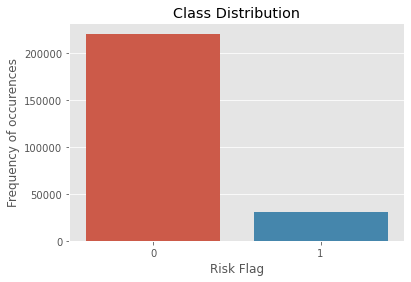

In [21]:
sns.countplot(x='risk_flag',data=df)
plt.xlabel('Risk Flag')
plt.ylabel('Frequency of occurences')
plt.title('Class Distribution')
plt.show()

### Observations
- Clear case of class imbalance most records indicates (approx. 85 %) belongs to class 0 & approx. 15% to class 1

In [22]:
print('Percentage of data belonging to Class 0 :', (df['risk_flag'].value_counts()[0]/df.shape[0])*100,'%')
print('Percentage of data belonging to Class 1 :', (df['risk_flag'].value_counts()[1]/df.shape[0])*100,'%')

Percentage of data belonging to Class 0 : 87.7 %
Percentage of data belonging to Class 1 : 12.3 %


## Marital Status

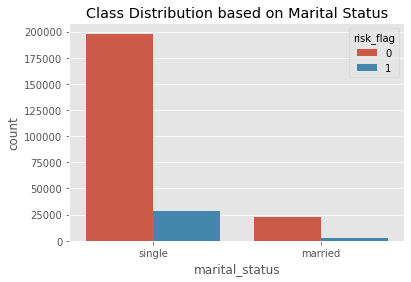

In [23]:
sns.countplot(x='marital_status', data=df, hue='risk_flag')
plt.title('Class Distribution based on Marital Status')
plt.show()

In [24]:
data_stats(df, query_col='marital_status', target_col='risk_flag')

Total defaulters based on marital_status 

risk_flag            0      1     All
marital_status                       
married          23092   2636   25728
single          197912  28360  226272
All             221004  30996  252000
Proportion of defaulters based on marital_status 

                risk_flag
marital_status           
married          0.102456
single           0.125336


### Observations

- Major chuck of a customer approx <b>90%</b> data belongs to unmarried(single) category which is unusual as married people take 
  the loan more often for building home and other but they consist of only <b>10%</b> of overall data.
- Interesting to see that still the loan default rate for <b>married is 10% and unmarried (single) is 12%</b>.
- Unless the data belongs to unmarried customer but still we see approx <b>only 2% difference in default rate</b>.

## Car-ownership

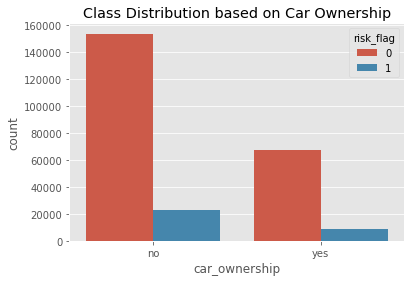

In [25]:
sns.countplot(x='car_ownership',data=df, hue='risk_flag')
plt.title('Class Distribution based on Car Ownership')
plt.show()

In [26]:
data_stats(df,'car_ownership', 'risk_flag',)

Total defaulters based on car_ownership 

risk_flag           0      1     All
car_ownership                       
no             153439  22561  176000
yes             67565   8435   76000
All            221004  30996  252000
Proportion of defaulters based on car_ownership 

               risk_flag
car_ownership           
no              0.128188
yes             0.110987


### Observations
- Only <b>30%</b> customer owns the car where as <b>70%</b> don't have any car.
- Considering the record number we see the defualt rate which is <b>12.8%</b> for not having car and <b>11%</b>
  having car-ownership.
- But having An asset increase customer credit and we still see small but valid difference in defualt rate of <b>2%</b> approx.

## House Ownership

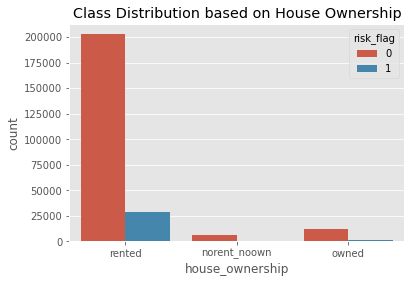

In [27]:
sns.countplot(x='house_ownership', data=df, hue='risk_flag')
plt.title('Class Distribution based on House Ownership')
plt.show()

In [28]:
data_stats(df,'house_ownership', 'risk_flag')

Total defaulters based on house_ownership 

risk_flag             0      1     All
house_ownership                       
norent_noown       6469    715    7184
owned             11758   1160   12918
rented           202777  29121  231898
All              221004  30996  252000
Proportion of defaulters based on house_ownership 

                 risk_flag
house_ownership           
norent_noown      0.099527
owned             0.089797
rented            0.125577


### Observations
- Measuring the category distribution <b>2%</b> belongs to not rented/not own,  approx. <b>5%</b> belongs to owned and more than 
  <b>92%</b> belongs to rented customers.
- Major chunk of customer's living in rented house/flat with default rate of <b>12%</b> which is quite higher than the other two
  categories owned only <b>8%</b>  and not rented/ not owned which is <b>9%</b>.
- Customer living on rent basis tend to apply for loan's more often <b>231898</b> out off <b>252000</b> for buidling their own houses or buying new flat in urban areas, which gives these kind of higher records  count. 
- The category <b>norent/noown these may be, are the customers who were living with their parents or living in joint family and house owned by the elder person in the house</b>.

## Customer Age

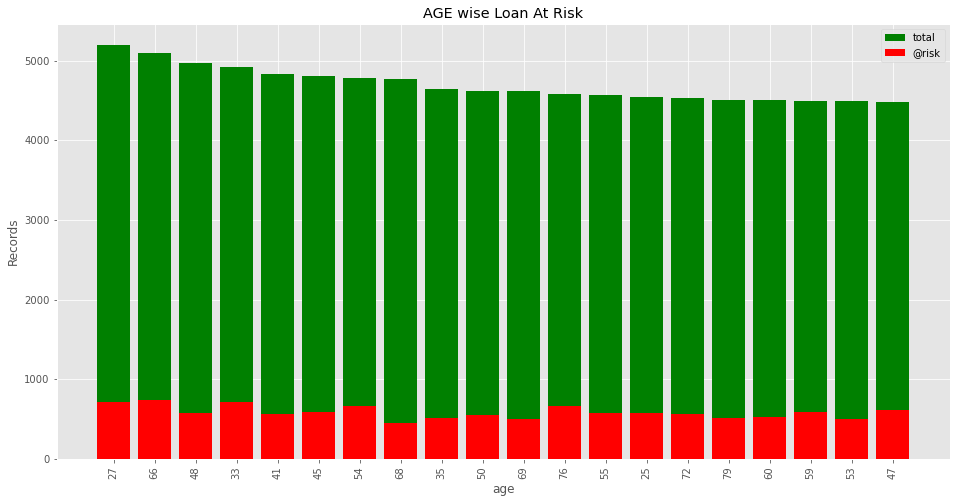

Top 5 with Lease Default Rate: AGE
    age  risk_flag  total_records  Average_@risk
47   68        451           4772       0.094510
48   69        497           4617       0.107646
14   35        513           4643       0.110489
32   53        501           4490       0.111581
58   79        513           4505       0.113873
Top 5 with Most Default Rate: AGE
    age  risk_flag  total_records  Average_@risk
33   54        660           4785       0.137931
6    27        720           5197       0.138541
45   66        737           5092       0.144737
55   76        666           4585       0.145256
12   33        719           4921       0.146109


In [29]:
univariate_barplot(df, 'age', 'risk_flag', top=20)

### Observations
- Looking at the Bar Chart we have Age Range of <b>21 to 79 </b>
- Customer with Age 27 has highest number of total record count more than <b>5500+</b> followed by 66 with <b>5200</b> records 
  and 48 with <b>4900+</b> records
- We observ approx. similar distribution of total record count for all Age number but un-even  risk flag count and defualt rate
- The Age 33 has most higher defualt rate of <b>14.61%</b> and least <b>9.4%</b> for Age 68 which is quite amazing as customer with older age has lower rate of default, normally we consider the older age customer @risk of loan default.

## Age Type

In [30]:
def age_type(age):
    if age > 19 and  age <= 29:
        return 'Young'
    elif age > 29 and age <= 39:
        return 'Adults'
    elif age > 39 and age <= 60:
        return 'Middle'
    else:
        return 'old'

- lets group the age based on 19-29 as young, 30 to 39 as adults, 40 to 60 as middle and 61-80 as old

In [31]:
# https://www.researchgate.net/figure/Age-intervals-and-age-groups_tbl1_228404297#:~:text=The%20adopted%20age%20groups%20are0,...
df['age_type'] = df.age.map(age_type)
df.age_type.value_counts()

Middle    90272
old       80812
Adults    41727
Young     39189
Name: age_type, dtype: int64

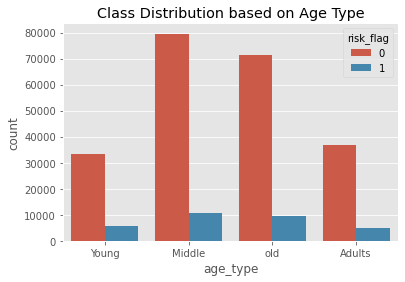

In [32]:
sns.countplot(x='age_type', data=df, hue='risk_flag')
plt.title('Class Distribution based on Age Type')
plt.show()

In [34]:
data_stats(df,'age_type', 'risk_flag')

Total defaulters based on age_type 

risk_flag       0      1     All
age_type                        
Adults      36636   5091   41727
Middle      79540  10732   90272
Young       33460   5729   39189
old         71368   9444   80812
All        221004  30996  252000
Proportion of defaulters based on age_type 

          risk_flag
age_type           
Adults     0.122007
Middle     0.118885
Young      0.146189
old        0.116864


### Observations
- Over <b> 90K </b> customer Aged group as Middle Age customer, <b> 80K </b> as old , <b> 41K </b> as Adults and <b> 39K </b> as Young customers
- Comparing the default rate we see that Younger customer has higher rate of default i.e. <b> 14.6%</b> and older customer with least default rate of  <b> 11.6% </b>  as we seen  before.
- Young people take the loans for their educations, startup bussiness etc, which not always helps them hence we see higher default rate.

## State

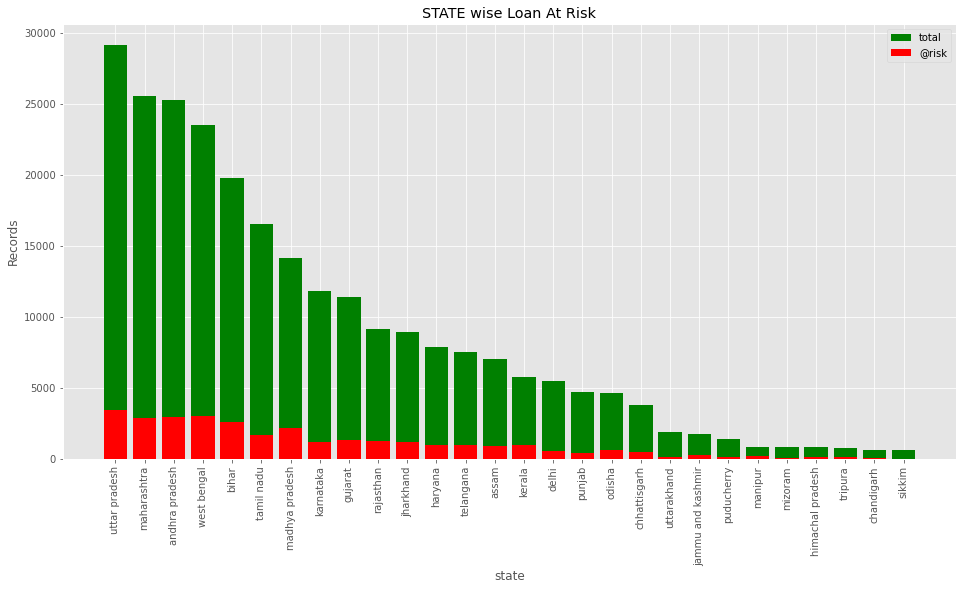

Top 5 with Lease Default Rate: STATE
          state  risk_flag  total_records  Average_@risk
21       sikkim         28            608       0.046053
26  uttarakhand        133           1874       0.070971
19       punjab        425           4720       0.090042
3    chandigarh         61            656       0.092988
11    karnataka       1189          11855       0.100295
Top 5 with Most Default Rate: STATE
                state  risk_flag  total_records  Average_@risk
13     madhya pradesh       2180          14122       0.154369
9   jammu and kashmir        283           1780       0.158989
12             kerala        970           5805       0.167097
24            tripura        136            809       0.168109
15            manipur        183            849       0.215548


In [61]:
univariate_barplot(df, 'state', 'risk_flag' )

### Observations
- Top 5 state with highest total records <b>Utter-Pradesh > Maharastra > Aadhra-Pradesh > West Bangal > Bihar </b> the major of records data are coming from these five states only approx. <b> 48% </b>.
- Top 5 state with Least total records <b> Sikkim < Chandigarh < Tripura < Himachal Pradesh < Mizoram </b>
- The state Sikkim has least default rate and also least records <b> 4% </b> and <b> 608 </b>.
- The State Manipur has highest default rate of <b> 21.5 %</b> that means of every 10 customer from manipur, approx. 3 will have loan default.
- State is one of the crucial feature shows the customer financial behaviour in different region on high level.
- After manipur there are four more states madhya pradesh, J&K , kerala and tripura with approx <b> 16% </b> average default rate. 

## City

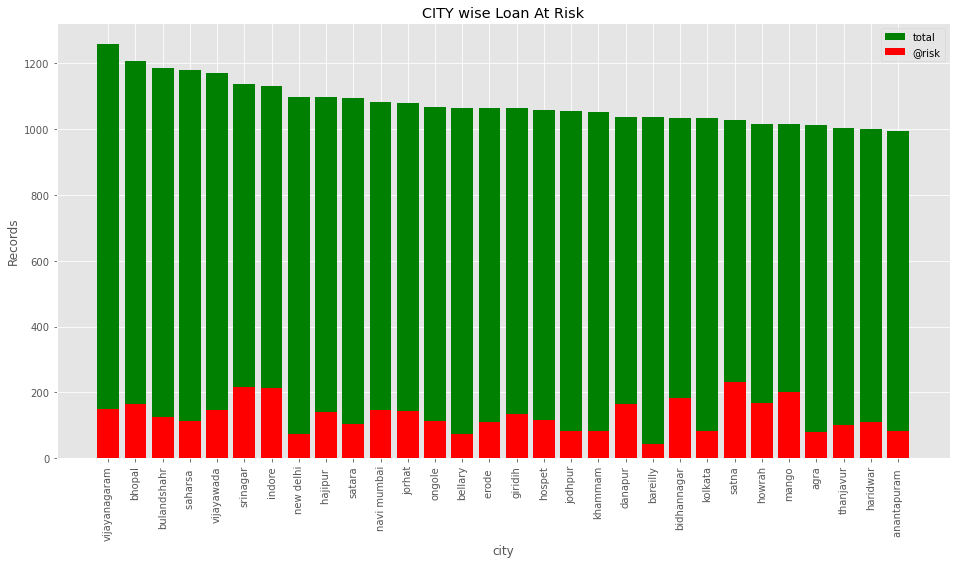

Top 5 with Lease Default Rate: CITY
          city  risk_flag  total_records  Average_@risk
34    bareilly         44           1036       0.042471
214  new delhi         74           1098       0.067395
38     bellary         73           1065       0.068545
139    jodhpur         82           1056       0.077652
154    khammam         82           1051       0.078021
Top 5 with Most Default Rate: CITY
            city  risk_flag  total_records  Average_@risk
57   bidhannagar        184           1033       0.178122
126       indore        212           1130       0.187611
281     srinagar        216           1136       0.190141
184        mango        200           1016       0.196850
263        satna        232           1028       0.225681


In [62]:
univariate_barplot(df, 'city', 'risk_flag',top=30)

In [37]:
state_group_df =df.groupby(['state','city'])['risk_flag'].agg('mean').sort_values(ascending=False).to_frame()
print('Top 5 Cities with their respective states and default rates')
print(state_group_df.head())
print("="*50)
print('Least 5 Cities with their respective states and default rates')
print(state_group_df.tail())

Top 5 Cities with their respective states and default rates
                            risk_flag
state          city                  
odisha         bhubaneswar   0.326194
madhya pradesh gwalior       0.272727
bihar          bettiah       0.266958
kerala         kochi         0.252862
west bengal    raiganj       0.239554
Least 5 Cities with their respective states and default rates
                              risk_flag
state       city                       
karnataka   bangalore          0.037139
            bijapur            0.034965
delhi       sultan pur majra   0.034091
uttarakhand dehradun           0.026346
gujarat     gandhinagar        0.026114


### Observations
- There are more than <b>317 unique cities</b> in our dataset 
- We see satna has over <b>232</b> risk Flag against <b>1028</b> total records which produces highest default rate of <b>22.56%</b>.
- The highest records are coming from the <b>vijayanagaram</b> over 1200+ and  the average records from each city are <b>795</b> approx. 
- The statewise distribution stats gives us better picture, we see the city <b>bhubaneswar</b> from the state <b>odisha</b> has over <b>32.6%</b> default rate. from <b>madhya pradesh</b>, the <b>gwalior</b> city has over <b>27.27%</b>. these indicates that from state Madhya pradesh over 27.2% default are coming from gwalior city only and same with other records.
- We see some city has very less default rate like bareilly of <b>4%</b>, New Delhi of <b>6%</b>.

## Profession 

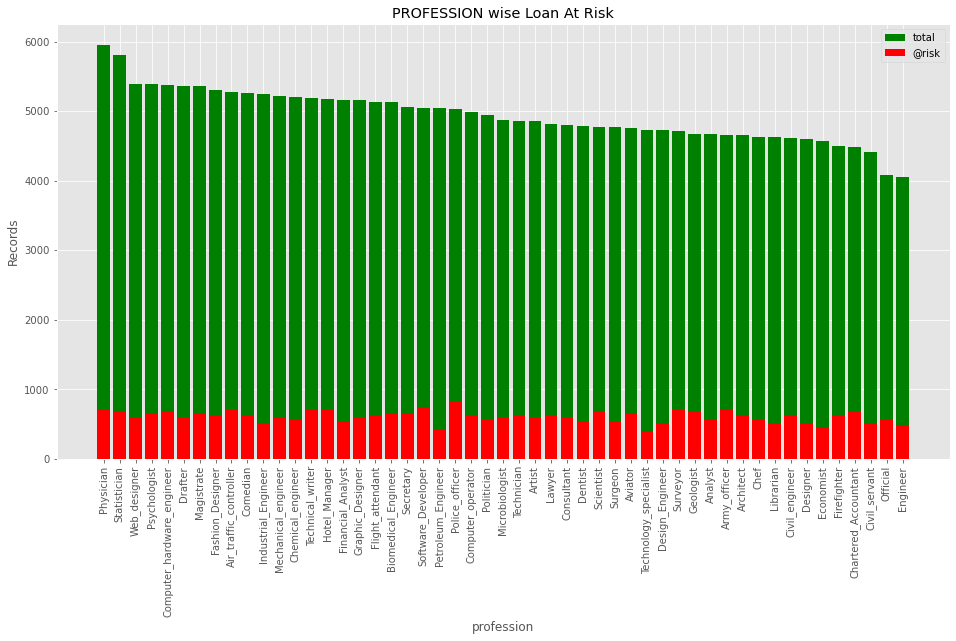

Top 5 with Lease Default Rate: PROFESSION
               profession  risk_flag  total_records  Average_@risk
49  Technology_specialist        386           4737       0.081486
36     Petroleum_Engineer        429           5041       0.085102
29    Industrial_Engineer        518           5250       0.098667
20              Economist        454           4573       0.099278
23      Financial_Analyst        533           5167       0.103155
Top 5 with Most Default Rate: PROFESSION
              profession  risk_flag  total_records  Average_@risk
43    Software_Developer        750           5053       0.148427
46              Surveyor        714           4714       0.151464
3           Army_officer        709           4661       0.152113
7   Chartered_Accountant        690           4493       0.153572
38        Police_officer        826           5035       0.164052


In [63]:
univariate_barplot(df, 'profession', 'risk_flag')

### Observations
- The Profession, one of the most important feature in risk identification, There are more than <b>51 unique proefession</b> were <b>physician and statistician</b> has most records over <b>6000</b> approx. in our dataset.
- Customers like, Who serving for the nation like <b>Police officers</b> and <b>Army officer</b> has higher default rate of <b>16.4%</b> and <b>15.3%</b> these profession people were get died while doing there duties which result in these numbers of loan default.
- But <b>Software Developers and C.A </b>. categories has also over <b>14.8%</b> and <b>15.21%</b> default rate which seems quite unsual as these people were has higher salary pay.
- Surveyor are the people who measure land features show about <b>15.1%</b> default rate.

## Year OF Experience

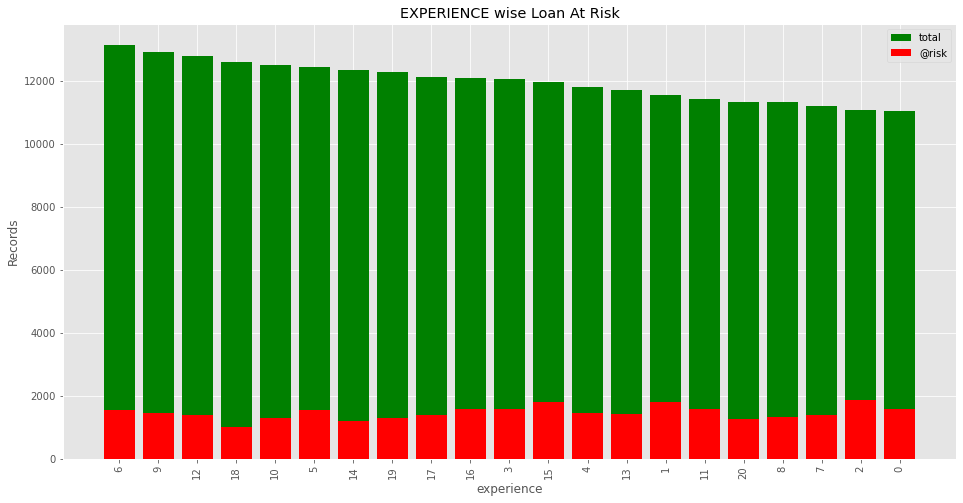

Top 5 with Lease Default Rate: EXPERIENCE
    experience  risk_flag  total_records  Average_@risk
18          18       1029          12601       0.081660
14          14       1212          12369       0.097987
10          10       1315          12503       0.105175
19          19       1305          12287       0.106210
12          12       1396          12800       0.109063
Top 5 with Most Default Rate: EXPERIENCE
    experience  risk_flag  total_records  Average_@risk
11          11       1584          11449       0.138353
0            0       1582          11043       0.143258
15          15       1808          11993       0.150755
1            1       1802          11575       0.155680
2            2       1890          11087       0.170470


In [64]:
univariate_barplot(df, query_col='experience',targate_col='risk_flag')

### Observations
- The Customer Experiance ranges <b>(0 - 20) Years</b> with Average Experiance of <b>10.08 Years</b>.
- We can clearly see <b>The customers with double digit experiance has least default rate </b> expect some cases like 11 and 15 
- Customer like 0 to 2 has higher default rate over <b>14.3%, 15.56% and 17.04% </b>.
- This indicate customers with very less experiance in their profession are at higher risk of default.

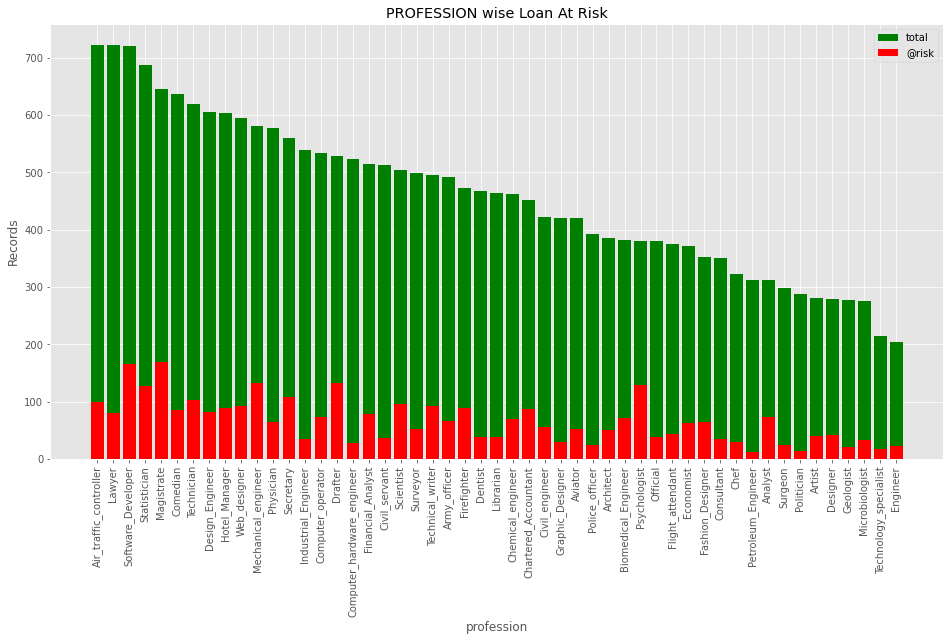

Top 5 with Lease Default Rate: PROFESSION
                    profession  risk_flag  total_records  Average_@risk
36          Petroleum_Engineer         12            313       0.038339
39                  Politician         14            288       0.048611
13  Computer_hardware_engineer         28            524       0.053435
38              Police_officer         24            392       0.061224
29         Industrial_Engineer         35            539       0.064935
Top 5 with Most Default Rate: PROFESSION
            profession  risk_flag  total_records  Average_@risk
43  Software_Developer        165            720       0.229167
1              Analyst         73            313       0.233227
19             Drafter        132            528       0.250000
32          Magistrate        169            646       0.261610
40        Psychologist        129            380       0.339474
records : (23442, 14)


In [65]:
# lets see the professions of 11 years experiance and 15 years experiance
profession_11_and_15 = df[(df['experience']==11) | (df['experience']==15)]
univariate_barplot(data=profession_11_and_15, query_col='profession', targate_col='risk_flag')
print('records :',profession_11_and_15.shape)

### Observations
- There ae more than 23K customers with 11 and 15 years of experiance
- The professions like <b>Psychologist Magistrate and Drafter </b> has over <b>28%</b> Average Combined default rate. 
- Still didn't get why this category customers has high default rate as these professions has quite good wealth.

## Annual Income

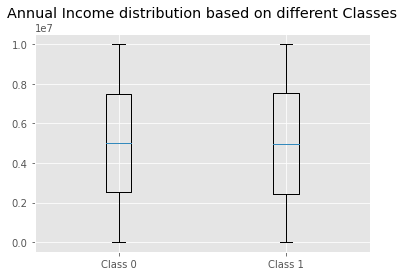

In [41]:
# income --- box plot
risk_flag_income = df[df['risk_flag'] == 1]['income']
not_risk_flag_income = df[df['risk_flag']==0]['income']
plt.boxplot([not_risk_flag_income,risk_flag_income])
plt.title('Annual Income distribution based on different Classes')
plt.xticks([1,2],('Class 0','Class 1'))
plt.show()

In [42]:
print('Mean Annual Income for Class 0: ', round(df[df['risk_flag'] == 0]['income'].mean()))
print('Mean Annual Income for Class 1: ', round(df[df['risk_flag'] == 1]['income'].mean()))

Mean Annual Income for Class 0:  5000449
Mean Annual Income for Class 1:  4973359


### Observations
- The Box plot highly similar for both classes with no outliers.

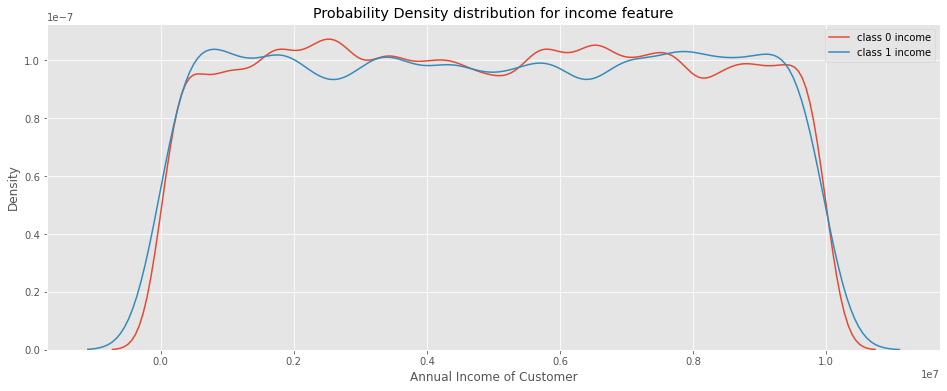

In [43]:
plt.figure(figsize=(16,6))
sns.distplot(not_risk_flag_income,hist=False, label='class 0 income')
sns.distplot(risk_flag_income,hist=False, label='class 1 income')
plt.legend()
plt.title('Probability Density distribution for income feature')
plt.xlabel('Annual Income of Customer')
plt.show()

### Observations
- There is high overlap between the classes based on the customers income 
- This  indicates only income feature not enough to differentiat the loan default.

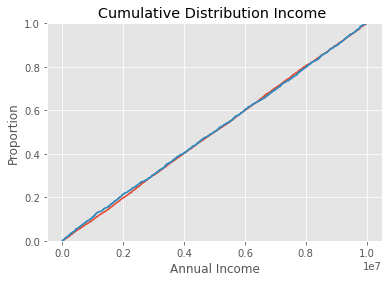

In [44]:
sns.ecdfplot(not_risk_flag_income)
sns.ecdfplot(risk_flag_income)
plt.title('Cumulative Distribution Income ')
plt.xlabel('Annual Income')
plt.show()

### Observations
- CDF plot also carry similar information not showning any differentiator between these two classes based on Income.

In [45]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ['Percentile','Risk Flag 0', 'Risk Flag 1']

for i in range(0, 101, 5):
    x.add_row([i, np.round(np.percentile(not_risk_flag_income, i), 3), np.round(np.percentile(risk_flag_income, i), 3)])
print(x)

+------------+-------------+-------------+
| Percentile | Risk Flag 0 | Risk Flag 1 |
+------------+-------------+-------------+
|     0      |   10310.0   |   10675.0   |
|     5      |   510754.0  |  431968.75  |
|     10     |  1044096.0  |   927040.0  |
|     15     |  1568292.0  |  1415711.0  |
|     20     |  2036508.0  |  1885923.0  |
|     25     |  2520632.75 |  2421029.0  |
|     30     |  2976480.0  |  2946448.0  |
|     35     |  3477314.0  |  3423478.0  |
|     40     |  3983577.8  |  3957826.0  |
|     45     |  4485310.0  |  4445947.0  |
|     50     |  5002134.0  |  4977653.0  |
|     55     |  5535576.0  |  5510977.75 |
|     60     |  6000177.0  |  5979323.0  |
|     65     |  6490702.0  |  6550245.75 |
|     70     |  6967997.0  |  7055950.0  |
|     75     |  7470480.0  |  7556052.0  |
|     80     |  7946836.0  |  8022038.0  |
|     85     |  8486446.0  |  8512476.0  |
|     90     |  8996641.0  |  9038552.0  |
|     95     |  9508705.0  |  9475430.0  |
|    100   

## Current Job Years

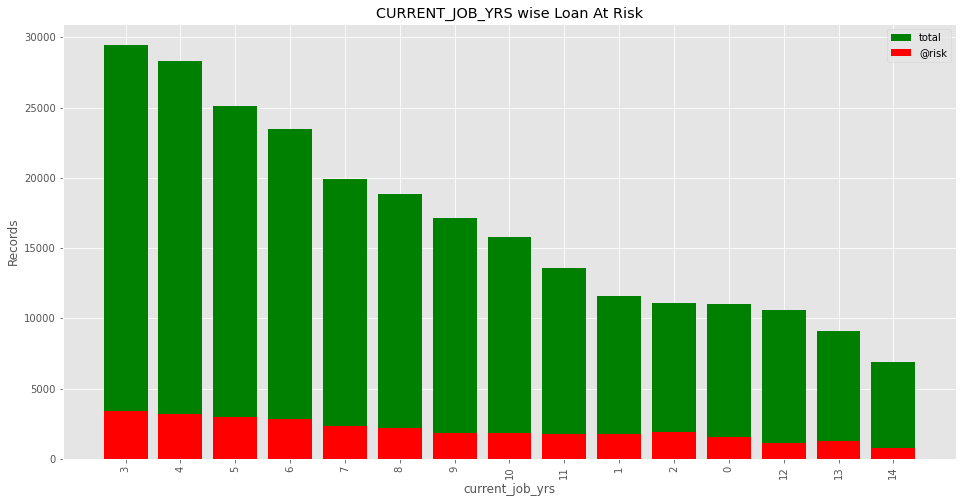

Top 5 with Lease Default Rate: CURRENT_JOB_YRS
    current_job_yrs  risk_flag  total_records  Average_@risk
12               12       1116          10605       0.105233
9                 9       1850          17132       0.107985
4                 4       3207          28339       0.113166
8                 8       2181          18874       0.115556
3                 3       3411          29460       0.115784
Top 5 with Most Default Rate: CURRENT_JOB_YRS
    current_job_yrs  risk_flag  total_records  Average_@risk
11               11       1802          13595       0.132549
13               13       1271           9099       0.139686
0                 0       1582          11043       0.143258
1                 1       1802          11575       0.155680
2                 2       1890          11087       0.170470


In [66]:
univariate_barplot(query_col='current_job_yrs',targate_col='risk_flag', data=df)

### Observations
- This feature is highly similar to the Experiance. 
- Again customers with job years between 0 to 2 have higher default rate over <b>17.04%</b> maximum.
- The Current Job years range between 0 to 14. 
- Overall <b>30% customers having current job years between  3 to 5</b>

<Figure size 720x432 with 0 Axes>

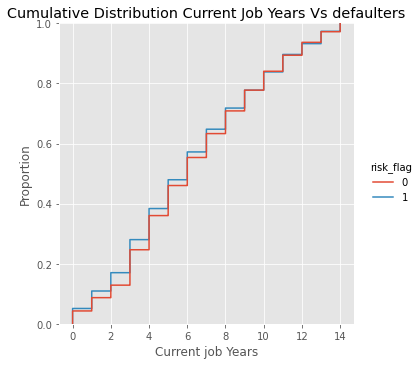

In [47]:
plt.figure(figsize=(10,6))
sns.displot(x='current_job_yrs', hue='risk_flag', data=df, kind='ecdf')
plt.title('Cumulative Distribution Current Job Years Vs defaulters')
plt.xlabel('Current job Years')
plt.show()

## Current House Years

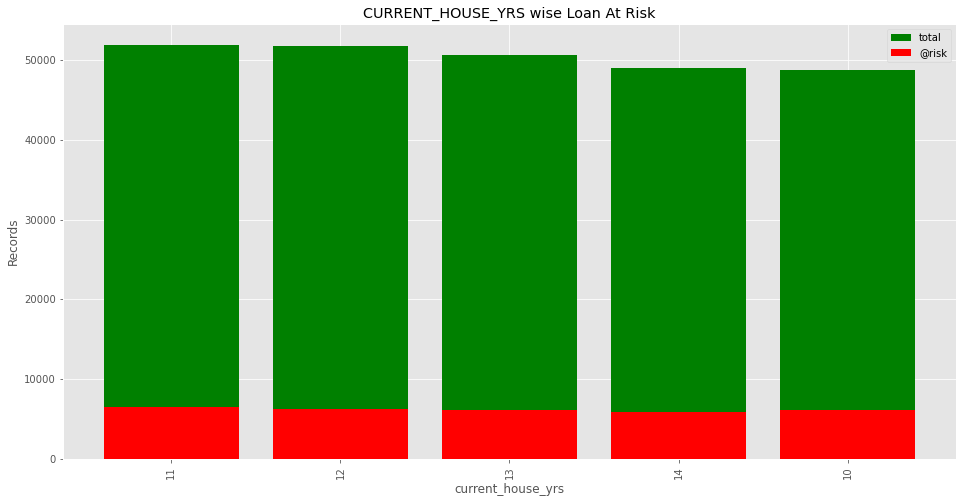

Top 5 with Lease Default Rate: CURRENT_HOUSE_YRS
   current_house_yrs  risk_flag  total_records  Average_@risk
4                 14       5945          49003       0.121319
2                 12       6304          51791       0.121720
3                 13       6182          50659       0.122032
0                 10       6082          48674       0.124954
1                 11       6483          51873       0.124978
Top 5 with Most Default Rate: CURRENT_HOUSE_YRS
   current_house_yrs  risk_flag  total_records  Average_@risk
4                 14       5945          49003       0.121319
2                 12       6304          51791       0.121720
3                 13       6182          50659       0.122032
0                 10       6082          48674       0.124954
1                 11       6483          51873       0.124978


In [67]:
univariate_barplot(query_col='current_house_yrs',targate_col='risk_flag', data=df, top=5)

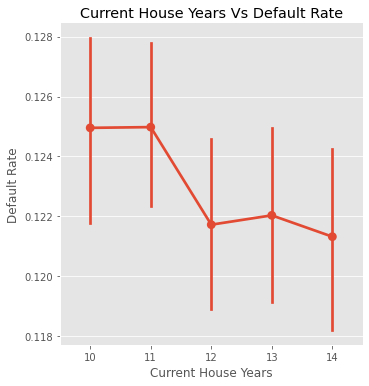

In [49]:
sns.factorplot(x='current_house_yrs',y='risk_flag',data=df)
plt.title('Current House Years Vs Default Rate')
plt.ylabel('Default Rate')
plt.xlabel('Current House Years')
plt.show()

### Observations
- We only 5 unique values for number of years living in the house from 10 to 14.
- The distributions of records and default rate is approximatly similar 
- From the 2nd plot we see minor difference of <b>0.2%</b> between years 10, 11 to years 12, 13, 14 in default rate.

## House Ownership Vs Car Ownership

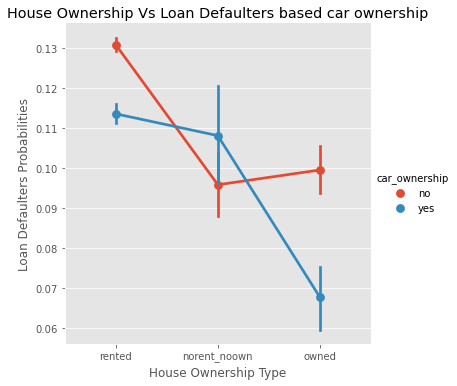

In [50]:
sns.factorplot(x='house_ownership',y='risk_flag',hue='car_ownership',data=df)
plt.title('House Ownership Vs Loan Defaulters based car ownership')
plt.xlabel('House Ownership Type')
plt.ylabel('Loan Defaulters Probabilities')
plt.show()

In [51]:
data_stats(df,'car_ownership', 'risk_flag', columns_list=['house_ownership'])

Total defaulters based on car_ownership 

risk_flag           0      1     All
car_ownership                       
no             153439  22561  176000
yes             67565   8435   76000
All            221004  30996  252000
Proportion of defaulters based on car_ownership 

house_ownership  norent_noown     owned    rented
car_ownership                                    
no                   0.095836  0.099520  0.130776
yes                  0.108083  0.067762  0.113523


### Observations
- Customers with rented house and having No car have <b>higher default rate 13.0%</b> comparing to customers with rented house and having car  <b>11%</b>
- Customers with own house an having no car have default rate of <b>9%</b> which higher than having from customer having own house and have own car of <b>6%</b>
- But Customers have living in house with no rent/ no own have default rate of <b>9% to 10% having no car or having Car</b> which not significant difference.
- This Analysis gives some differentiation for risk flag 0 and 1.

## House Ownership  Vs Marital Status

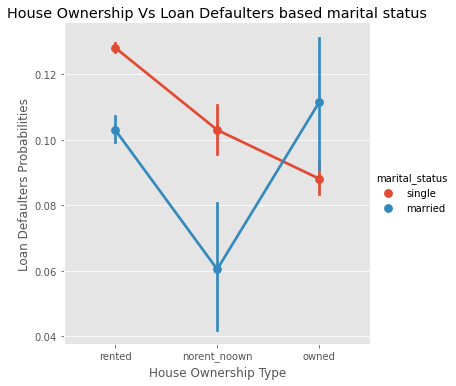

In [52]:
sns.factorplot(x='house_ownership',y='risk_flag',hue='marital_status',data=df)
plt.title('House Ownership Vs Loan Defaulters based marital status')
plt.xlabel('House Ownership Type')
plt.ylabel('Loan Defaulters Probabilities')
plt.show()

In [53]:
data_stats(df, 'house_ownership','risk_flag', columns_list=['marital_status'])

Total defaulters based on house_ownership 

risk_flag             0      1     All
house_ownership                       
norent_noown       6469    715    7184
owned             11758   1160   12918
rented           202777  29121  231898
All              221004  30996  252000
Proportion of defaulters based on house_ownership 

marital_status    married    single
house_ownership                    
norent_noown     0.060504  0.103051
owned            0.111593  0.088120
rented           0.103139  0.128192


### Observations
- We see the <b>significant difference in default rate for rented and no rent/ no own on basis of their marital status</b>.
- If customers is single and lives in ranted house has higher chances of loan default over <b>12%</b>.
- If customers is married and lives in no rent / no own house has lesser chances of loan default over <b>6%</b>.
- Customer with Marital status as <b>Single</b> show slightly higher default rate irrespective their house ownership.


## Age Type Vs Marital Status

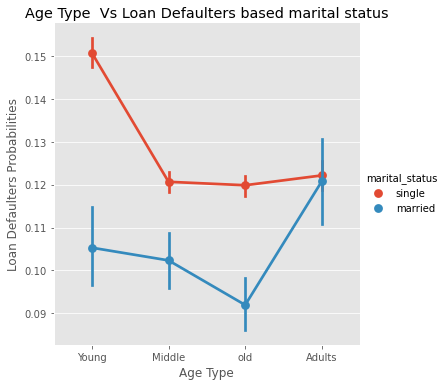

In [54]:
sns.factorplot(x='age_type',y='risk_flag',hue='marital_status',data=df)
plt.title('Age Type  Vs Loan Defaulters based marital status')
plt.xlabel('Age Type')
plt.ylabel('Loan Defaulters Probabilities')
plt.show()

In [51]:
data_stats(df, 'age_type','risk_flag', columns_list=['marital_status'])

Total defaulters based on age_type 

risk_flag       0      1     All
age_type                        
Adults      36636   5091   41727
Middle      79540  10732   90272
Young       33460   5729   39189
old         71368   9444   80812
All        221004  30996  252000
Proportion of defaulters based on age_type 

marital_status   married    single
age_type                          
Adults          0.120787  0.122152
Middle          0.102344  0.120659
Young           0.105304  0.150687
old             0.091957  0.119860


### Observations
- Customers with Marital status Married tend to lower default rate as compare to Single.
- Customers of Youger age and marital status single tend to have higher default rate of <b>15%</b> 

## Age Type Vs Car Ownership

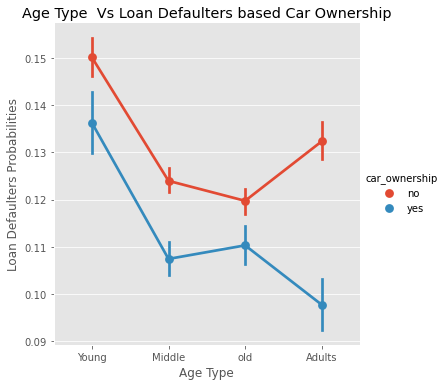

In [55]:
sns.factorplot(x='age_type',y='risk_flag',hue='car_ownership',data=df)
plt.title('Age Type  Vs Loan Defaulters based Car Ownership')
plt.xlabel('Age Type')
plt.ylabel('Loan Defaulters Probabilities')
plt.show()

In [55]:
data_stats(df, 'age_type','risk_flag', columns_list=['car_ownership'])

Total defaulters based on age_type 

risk_flag       0      1     All
age_type                        
Adults      36636   5091   41727
Middle      79540  10732   90272
Young       33460   5729   39189
old         71368   9444   80812
All        221004  30996  252000
Proportion of defaulters based on age_type 

car_ownership        no       yes
age_type                         
Adults         0.132329  0.097761
Middle         0.123968  0.107456
Young          0.150092  0.136253
old            0.119743  0.110324


### Observations
- We clear that customers based on their Age Type having no car has higher default rate in every Age Type Category.
- After all the analysis we see Younger Age customers are at higher risk of loan default

## Correlations Plot

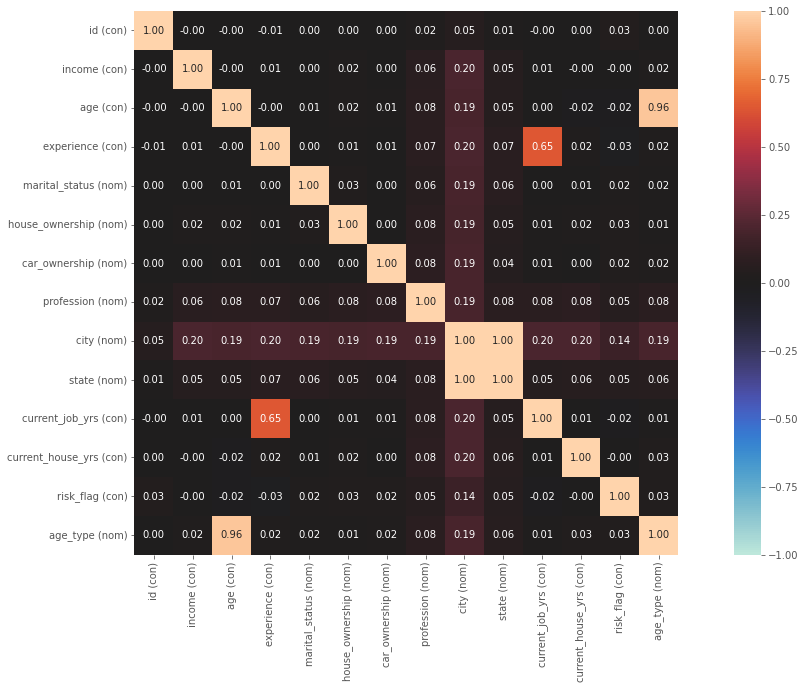

{'corr':                          id (con)  ...  age_type (nom)
 id (con)                 1.000000  ...        0.003016
 income (con)            -0.001324  ...        0.017363
 age (con)               -0.001816  ...        0.955515
 experience (con)        -0.005810  ...        0.022758
 marital_status (nom)     0.001134  ...        0.015313
 house_ownership (nom)    0.002696  ...        0.013967
 car_ownership (nom)      0.004313  ...        0.019196
 profession (nom)         0.022028  ...        0.076944
 city (nom)               0.054482  ...        0.193711
 state (nom)              0.014014  ...        0.055751
 current_job_yrs (con)   -0.003250  ...        0.008960
 current_house_yrs (con)  0.001972  ...        0.027661
 risk_flag (con)          0.032153  ...        0.030739
 age_type (nom)           0.003016  ...        1.000000
 
 [14 rows x 14 columns],
 'ax': <AxesSubplot: >}

In [52]:
# https://www.kaggle.com/questions-and-answers/181332
nominal.associations(df, figsize=(20, 10), mark_columns=True)

### Observations 
- Feature like current_job_yrs and experiance carry similar informations and hense show higher correlation
- City Feature show positive correleation across all the features of average 0.2


In [ ]:
df.to_csv('preprocessed_data.csv', index=False)

In [8]:
df = pd.read_csv('preprocessed_data.csv')
df  = df.drop(columns=['Unnamed: 0'])
df.head()

,id,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,age_type
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,rewa,madhya pradesh,3,13,0,Young
1,2,7574516,40,10,single,rented,no,Software_Developer,parbhani,maharashtra,9,13,0,Middle
2,3,3991815,66,4,married,rented,no,Technical_writer,alappuzha,kerala,4,10,0,old
3,4,6256451,41,2,single,rented,yes,Software_Developer,bhubaneswar,odisha,2,12,1,Middle
4,5,5768871,47,11,single,rented,no,Civil_servant,tiruchirappalli,tamil nadu,3,14,1,Middle


In [9]:
df.shape

(252000, 14)

## Train Test Split

In [10]:
X = df.drop(['risk_flag'], axis=1)
y = df['risk_flag']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=42, test_size=0.25)
print('Training data in hand :', X_train.shape, y_train.shape)
print('Test data in hand :', X_test.shape, y_test.shape)

Training data in hand : (189000, 13) (189000,)
Test data in hand : (63000, 13) (63000,)


In [12]:
X_train.to_csv('training_data.csv',index=False)
y_train.to_csv('training_target.csv', index=False)

In [13]:
X_test.to_csv('test_data.csv',index=False)
y_test.to_csv('test_target.csv',index=False)

In [14]:
print('Class Distribution in Training data class 0:',round((y_train.value_counts()[0] / y_train.shape[0])*100), '%')
print('Class Distribution in Training data class 1:',round((y_train.value_counts()[1] / y_train.shape[0])*100), '%')

Class Distribution in Training data class 0: 88 %
Class Distribution in Training data class 1: 12 %


In [15]:
print('Class Distribution in Test data class 0:',round((y_test.value_counts()[0] / y_test.shape[0])*100), '%')
print('Class Distribution in Test data class 1:',round((y_test.value_counts()[1] / y_test.shape[0])*100), '%')

Class Distribution in Test data class 0: 88 %
Class Distribution in Test data class 1: 12 %


# Feature Engineering and encoding

In [16]:
# Let's remove current_job_yrs based on EDA, as current_job_yrs and experiance are carring same informations
# remove the id column as it not required for final modeling
df.drop(['id','current_job_yrs'], axis=1, inplace=True)
df.shape

(252000, 12)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   income             252000 non-null  int64 
 1   age                252000 non-null  int64 
 2   experience         252000 non-null  int64 
 3   marital_status     252000 non-null  object
 4   house_ownership    252000 non-null  object
 5   car_ownership      252000 non-null  object
 6   profession         252000 non-null  object
 7   city               252000 non-null  object
 8   state              252000 non-null  object
 9   current_house_yrs  252000 non-null  int64 
 10  risk_flag          252000 non-null  int64 
 11  age_type           252000 non-null  object
dtypes: int64(5), object(7)
memory usage: 23.1+ MB


In [18]:
df.nunique()

income               41920
age                     59
experience              21
marital_status           2
house_ownership          3
car_ownership            2
profession              51
city                   317
state                   28
current_house_yrs        5
risk_flag                2
age_type                 4
dtype: int64

### Lets Perform response encoding for Categorical Feature Having Unique Values > 5

In [19]:
def fit_response_encoding(alpha, feature):
    # get the frequency of each category in feature 
    data_values = X_train[feature].value_counts()
    feat_dict = {}
    # compute class probability for each category
    for value, total_occurence in data_values.items():
        class_proba_vector = []
        for _class in range(0, 2):
            
            # find total occurence of a class for each category
            class_occurence = len(X_train.loc[(X_train[feature] == value) & (y_train == _class)])
            # compute the  class probability with respect to category in feature with small value alpha (laplace smoothing term)
            class_value_proba = (class_occurence + alpha *10) /  ( total_occurence + alpha*20)
            # append the probability of each class w.r.t. category in feature
            class_proba_vector.append(class_value_proba)
        # store the result vector in master dictionary
        feat_dict[value] = class_proba_vector
    return feat_dict

In [20]:
def transform_response_encoding(alpha, feature, data):
    # store the probability of each class w.r.t. category feature
    result_feature = []
    # get probability from training data of each class w.r.t. category in feature
    feature_proba = fit_response_encoding(alpha, feature)
    # for each data row
    for category in data:
        # if category found in probability dictionary
        if category in feature_proba.keys():
            result_feature.append(feature_proba[category])
        else:
            # if not category found
            result_feature.append([0.5,0.5])
    return np.array(result_feature)

- Response Encoding State Feature

In [21]:
X_train_state_re = transform_response_encoding(alpha=1, feature='state',data=X_train.state.values)
X_test_state_re = transform_response_encoding(alpha=1, feature='state', data=X_test.state.values)

print('after response encoding ...')
print(X_train_state_re.shape, y_train.shape)
print(X_test_state_re.shape, y_test.shape)

after response encoding ...
(189000, 2) (189000,)
(63000, 2) (63000,)


- Response Encoding City Feature

In [22]:
X_train_city_re = transform_response_encoding(alpha=1, feature='city',data=X_train.city.values)
X_test_city_re = transform_response_encoding(alpha=1, feature='city', data=X_test.city.values)

print('after response encoding ...')
print(X_train_city_re.shape, y_train.shape)
print(X_test_city_re.shape, y_test.shape)

after response encoding ...
(189000, 2) (189000,)
(63000, 2) (63000,)


- Response Encoding Profession Feature

In [23]:
X_train_profession_re = transform_response_encoding(alpha=1, feature='city',data=X_train.profession.values)
X_test_profession_re = transform_response_encoding(alpha=1, feature='city', data=X_test.profession.values)

print('after response encoding ...')
print(X_train_profession_re.shape, y_train.shape)
print(X_test_profession_re.shape, y_test.shape)

after response encoding ...
(189000, 2) (189000,)
(63000, 2) (63000,)


### Label Encoding Feature 
- House Ownership
- Car Ownership
- Marital Status
- Age Type

- Lets encode based on mode e.g. for highest occurence 0 then second highest 1 and so on.

- House Ownership

In [24]:
X_train.house_ownership.value_counts()

rented          173829
owned             9783
norent_noown      5388
Name: house_ownership, dtype: int64

In [25]:
X_train['house_ownership'] = X_train['house_ownership'].map({'rented':0, 'owned':1, 'norent_noown':2})
X_test['house_ownership'] = X_test['house_ownership'].map({'rented':0, 'owned':1, 'norent_noown':2})

- Car Ownership Label Encoding

In [26]:
X_train.car_ownership.value_counts()

no     132375
yes     56625
Name: car_ownership, dtype: int64

In [27]:
X_train['car_ownership'] = X_train['car_ownership'].map({'no':0, 'yes':1})
X_test['car_ownership'] = X_test['car_ownership'].map({'no':0, 'yes':1})

In [28]:
X_train.car_ownership.value_counts()

0    132375
1     56625
Name: car_ownership, dtype: int64

- Marital Status Label Encoding

In [29]:
X_train.marital_status.value_counts()

single     169783
married     19217
Name: marital_status, dtype: int64

In [30]:
X_train['marital_status'] = X_train['marital_status'].map({'single':0, 'married':1})
X_test['marital_status'] = X_test['marital_status'].map({'single':0, 'married':1})

In [31]:
X_train.marital_status.value_counts()

0    169783
1     19217
Name: marital_status, dtype: int64

- Age Type Label Encoding

In [32]:
X_train.age_type.value_counts()

Middle    67603
old       60811
Adults    31321
Young     29265
Name: age_type, dtype: int64

In [33]:
X_train['age_type'] = X_train['age_type'].map({'Middle':0, 'old':1, 'Adults':2, 'Young':3})
X_test['age_type'] = X_test['age_type'].map({'Middle':0, 'old':1, 'Adults':2, 'Young':3})

In [34]:
X_train.age_type.value_counts()

0    67603
1    60811
2    31321
3    29265
Name: age_type, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   income             252000 non-null  int64 
 1   age                252000 non-null  int64 
 2   experience         252000 non-null  int64 
 3   marital_status     252000 non-null  object
 4   house_ownership    252000 non-null  object
 5   car_ownership      252000 non-null  object
 6   profession         252000 non-null  object
 7   city               252000 non-null  object
 8   state              252000 non-null  object
 9   current_house_yrs  252000 non-null  int64 
 10  risk_flag          252000 non-null  int64 
 11  age_type           252000 non-null  object
dtypes: int64(5), object(7)
memory usage: 23.1+ MB


In [36]:
X_train_remaining_cat_le_features = X_train[['house_ownership','car_ownership','marital_status','age_type']].values
X_test_remaining_cat_le_features = X_test[['house_ownership','car_ownership','marital_status','age_type']].values

### Scaling Numerical Features
- Age
- Experiance
- income
- current house yrs

In [37]:
# age
normalizer = MinMaxScaler()
normalizer.fit(X_train['age'].values.reshape(-1,1)) 

X_train_age_norm = normalizer.transform(X_train['age'].values.reshape(-1,1)) 
X_test_age_norm = normalizer.transform(X_test['age'].values.reshape(-1,1))


print("After vectorizations")
print(X_train_age_norm.shape, y_train.shape)
print(X_test_age_norm.shape, y_test.shape)

After vectorizations
(189000, 1) (189000,)
(63000, 1) (63000,)


In [38]:
# Experience
normalizer = MinMaxScaler()
normalizer.fit(X_train['experience'].values.reshape(-1,1)) 

X_train_experience_norm = normalizer.transform(X_train['experience'].values.reshape(-1,1)) 
X_test_experience_norm = normalizer.transform(X_test['experience'].values.reshape(-1,1))


print("After vectorizations")
print(X_train_experience_norm.shape, y_train.shape)
print(X_test_experience_norm.shape, y_test.shape)

After vectorizations
(189000, 1) (189000,)
(63000, 1) (63000,)


In [39]:
# income
normalizer = MinMaxScaler()
normalizer.fit(X_train['income'].values.reshape(-1,1)) 

X_train_income_norm = normalizer.transform(X_train['income'].values.reshape(-1,1)) 
X_test_income_norm = normalizer.transform(X_test['income'].values.reshape(-1,1))


print("After vectorizations")
print(X_train_income_norm.shape, y_train.shape)
print(X_test_income_norm.shape, y_test.shape)

After vectorizations
(189000, 1) (189000,)
(63000, 1) (63000,)


In [40]:
# current_house_yrs
normalizer = MinMaxScaler()
normalizer.fit(X_train['current_house_yrs'].values.reshape(-1,1)) 

X_train_current_house_yrs_norm = normalizer.transform(X_train['current_house_yrs'].values.reshape(-1,1)) 
X_test_current_house_yrs_norm = normalizer.transform(X_test['current_house_yrs'].values.reshape(-1,1))


print("After vectorizations")
print(X_train_current_house_yrs_norm.shape, y_train.shape)
print(X_test_current_house_yrs_norm.shape, y_test.shape)

After vectorizations
(189000, 1) (189000,)
(63000, 1) (63000,)


In [41]:

X_train_stack = np.hstack((X_train_state_re, X_train_city_re, X_train_profession_re, X_train_remaining_cat_le_features, X_train_age_norm, X_train_experience_norm,
                         X_train_income_norm, X_train_current_house_yrs_norm))
X_test_stack = np.hstack((X_test_state_re, X_test_city_re, X_test_profession_re, X_test_remaining_cat_le_features, X_test_age_norm, X_test_experience_norm,
                         X_test_income_norm, X_test_current_house_yrs_norm))

In [42]:
data_columns = ['state_re_0', 'state_re_1', 'city_re_0', 'city_re_1', 'prefession_re_0',
       'profession_re_1', 'house_ownership_le', 'car_ownership_le',
       'marital_status_le', 'age_type_le', 'age_norm', 'experience_norm',
       'income_nrom', 'current_house_yrs_norm']
X_train_stack_df = pd.DataFrame(X_train_stack, columns=data_columns)
X_test_stack_df = pd.DataFrame(X_test_stack, columns=data_columns)

In [43]:
X_train_stack_df.to_csv('final_training_data.csv')
X_test_stack_df.to_csv('final_test_data.csv')


In [44]:
y_train.to_csv('final_training_target.csv',index=False)
y_test.to_csv('final_test_target.csv',index=False)

In [45]:
print('Final training data :', X_train_stack_df.shape, y_train.shape)
print('Final Test data : ', X_test_stack_df.shape, y_test.shape)

Final training data : (189000, 14) (189000,)
Final Test data :  (63000, 14) (63000,)


# Modeling

## Dummy Model

In [39]:
y_pred_list = []
for value in range(y_test.shape[0]):
    y_pred = random.randint(0,1)
    y_pred_list.append(y_pred)


In [40]:
y_true = np.array(y_test.values)
print('roc_auc_score for dummy Model is {:.4f}'.format(roc_auc_score(y_true, y_pred_list)))

roc_auc_score for dummy Model is 0.4949


## Base Line Model

In [41]:
from sklearn.naive_bayes import GaussianNB
gaussian_model = GaussianNB()
gaussian_model.fit(X_train_stack, y_train)

GaussianNB()

In [42]:
y_pred = gaussian_model.predict(X_test_stack)
print('roc_auc_score for Baseline  Model is {:.4f}'.format(roc_auc_score(y_true, y_pred)))

roc_auc_score for Baseline  Model is 0.5308


## Feature selection based on Feature Importance 

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

classifier = RandomForestClassifier(n_estimators=30, n_jobs=-1)
top_features = SelectFromModel(classifier, threshold=-np.inf)
classifier.fit(X_train_stack_df, y_train)

RandomForestClassifier(n_estimators=30, n_jobs=-1)

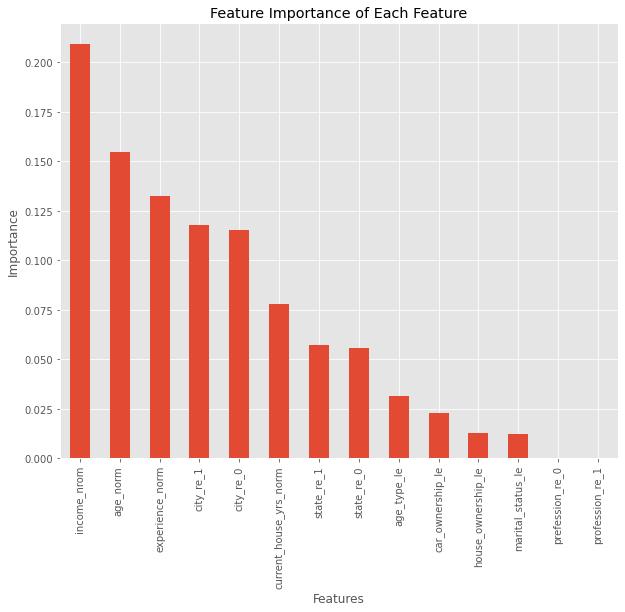

In [48]:
plt.figure(figsize=(10,8))
plt.title('Feature Importance of Each Feature')
pd.Series(classifier.feature_importances_, index=data_columns).sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

## Observations 
- Feature Profession has no contribution towards predicting the loan default.
- This could be major issue as many of the times customers are asked about their occupations and working while giving loans.
- But at same time their geographical info, experiance they have in their field, their relational status, expenses they own, and major their income has greater contribution to predicting the loan default. 

In [49]:
X_train_stack_df.columns

Index(['state_re_0', 'state_re_1', 'city_re_0', 'city_re_1', 'prefession_re_0',
       'profession_re_1', 'house_ownership_le', 'car_ownership_le',
       'marital_status_le', 'age_type_le', 'age_norm', 'experience_norm',
       'income_nrom', 'current_house_yrs_norm'],
      dtype='object')

In [50]:
X_train_stack_df.drop(columns=['prefession_re_0','profession_re_1'], axis=1, inplace=True)
X_test_stack_df.drop(columns=['prefession_re_0','profession_re_1'], axis=1, inplace=True)

In [51]:
X_train_stack_df.shape, X_test_stack_df.shape

((189000, 12), (63000, 12))

## SMOTE with ENN To tackle data imbalanced problem.

In [52]:
from imblearn.combine import SMOTEENN
# https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html
from collections import Counter
smote_enn = SMOTEENN()
print('before sampling using smote...', Counter(y_train))
X_train_resample, y_train_resample = smote_enn.fit_resample(X_train_stack_df, y_train.ravel())
print('after sampling using smote...',Counter(y_train_resample))
X_test_resample , y_test_resample = smote_enn.fit_resample(X_test_stack_df, y_test.ravel())

before sampling using smote... Counter({0: 165753, 1: 23247})
after sampling using smote... Counter({0: 142295, 1: 58958})


## Utility functions 


In [55]:
## AAIC
def find_best_threshold(threshould, fpr, tpr):
    """ Find the best probability threshould for seperating class 0 and class 1  """
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t
## AAIC
def predict_with_best_t(proba, threshould):
    """ Make the predections based on selected threshould probability and predicted probability for the record"""
    predictions = []
    
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [56]:
## inspiered by AAIC
from sklearn.metrics import roc_curve, auc, classification_report
def plot_evaluations_graphs(model, X_train, X_test, y_train, y_test):
    """ Plot the graphs to evaluate the performance of ML Models  """
    # finding the probabilities from model
    y_train_probs = model.predict_proba(X_train)[:,1] 
    y_test_probs= model.predict_proba(X_test )[:,1]

    # extracting the true positive and false positive rates 
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_probs) 
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_probs)

    plt.figure(figsize=(12,8))
    plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("False Positive Rate(FPR)")
    plt.ylabel("True Positive Rate(TPR)")
    plt.title("ROC CURVE with AUC Scores for Trining and test data")
    plt.grid(color='black',lw=0.5)
    plt.show()

    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    cm = confusion_matrix(y_train, predict_with_best_t(y_train_probs,best_t))
    print(cm)
    # https://seaborn.pydata.org/generated/seaborn.heatmap.html
    # https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
    sns.heatmap(cm, annot=True,fmt='g' ,cmap="YlGnBu",cbar=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Train Data: Confusion Matrix')
    plt.show()

    ## confusion metrix for test results
    best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)

    cm = confusion_matrix(y_test, predict_with_best_t(y_test_probs,best_t))
    print(cm)
    # https://seaborn.pydata.org/generated/seaborn.heatmap.html
    # https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
    sns.heatmap(cm, annot=True,fmt='g' ,cmap="YlGnBu",cbar=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Test Data: Confusion Matrix')
    plt.show()
    print('--------------classfication report for test data --------------------')
    print(classification_report(y_test, predict_with_best_t(y_test_probs, best_t)))

## Logistic Regression with HyperParameter Tunning

In [49]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [50]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

param_grid =  dict(solver= solvers, penalty=penalty, C= c_values)
logistic_reg_model = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=5, scoring='roc_auc',return_train_score=True, n_jobs=-1)

logistic_reg_model.fit(X_train_resample, y_train_resample)

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             return_train_score=True, scoring='roc_auc')

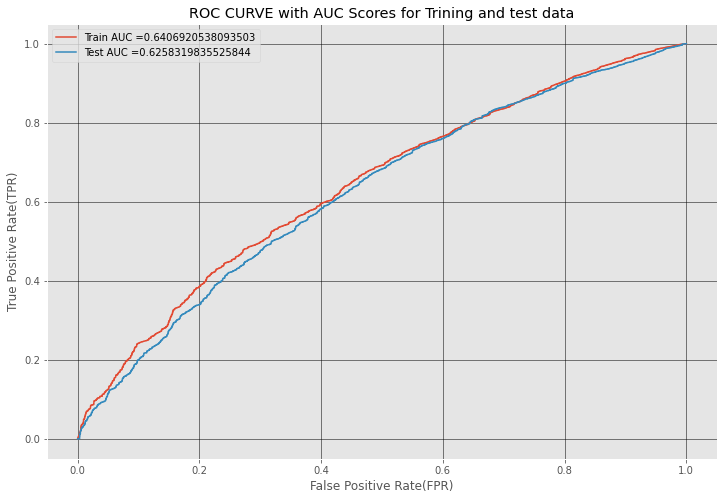

the maximum value of tpr*(1-fpr) 0.35947223129789707 for threshold 0.506
[[90762 51617]
 [26371 34100]]


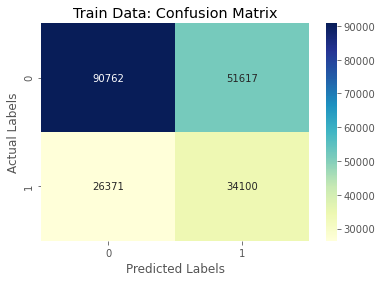

the maximum value of tpr*(1-fpr) 0.35088817718803256 for threshold 0.494
[[28752 19502]
 [10605 15191]]


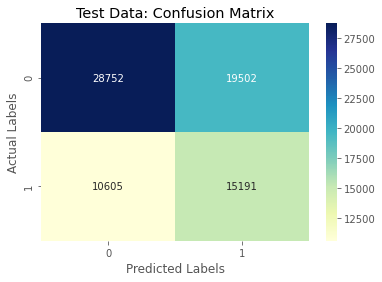

--------------classfication report for test data --------------------
              precision    recall  f1-score   support

           0       0.73      0.60      0.66     48254
           1       0.44      0.59      0.50     25796

    accuracy                           0.59     74050
   macro avg       0.58      0.59      0.58     74050
weighted avg       0.63      0.59      0.60     74050



In [51]:
plot_evaluations_graphs(logistic_reg_model, X_train_resample, X_test_resample, y_train_resample, y_test_resample)

In [78]:
print('best parameter grid :', logistic_reg_model.best_params_)
print('best score :',logistic_reg_model.best_score_)

best parameter grid : {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
best score : 0.6404687458603859


### Observations 
- We got roc_auc score about 0.62 on test data which is better than our base model.
- Recall and precision for class 1 is not that great we need to improve the score for specifically class 1, 0.48 and 0.69

## Decision Tree with HyperParameter Tunning

In [58]:
## imports 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
criterion = ['gini','entropy','log_loss']
max_depth = [2, 4, 6, 8]
min_samples_split = [50, 75, 100, 125]
max_features = ['auto','sqrt','log2']
param_grid = dict(criterion=criterion, max_depth=max_depth, max_features=max_features, min_samples_split=min_samples_split)
dt_model = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), param_grid, cv=5, scoring='roc_auc',return_train_score=True, n_jobs=-1)

dt_model.fit(X_train_resample, y_train_resample)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [50, 75, 100, 125]},
             return_train_score=True, scoring='roc_auc')

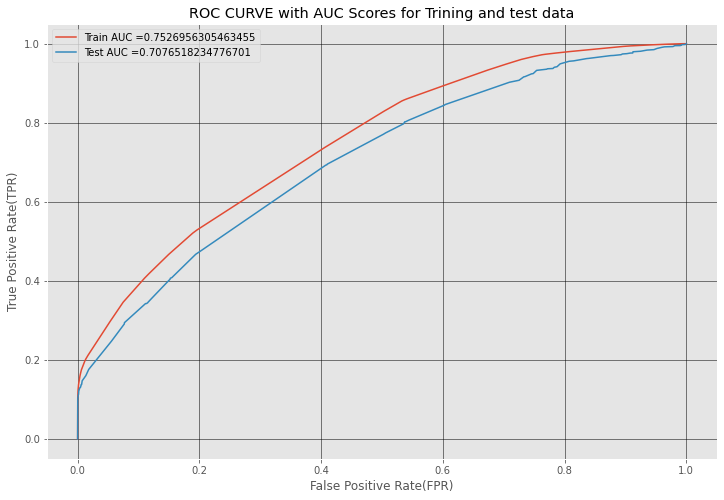

the maximum value of tpr*(1-fpr) 0.4383774871502078 for threshold 0.499
[[84872 57507]
 [16000 44471]]


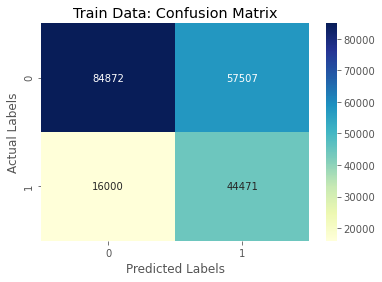

the maximum value of tpr*(1-fpr) 0.410428801119172 for threshold 0.499
[[28589 19665]
 [ 7926 17870]]


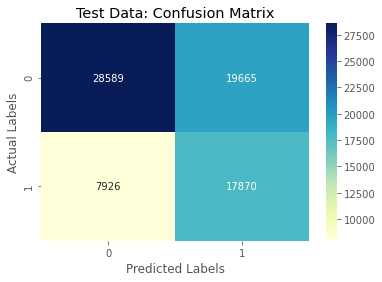

--------------classfication report for test data --------------------
              precision    recall  f1-score   support

           0       0.78      0.59      0.67     48254
           1       0.48      0.69      0.56     25796

    accuracy                           0.63     74050
   macro avg       0.63      0.64      0.62     74050
weighted avg       0.68      0.63      0.64     74050



In [59]:
plot_evaluations_graphs(dt_model, X_train_resample, X_test_resample, y_train_resample, y_test_resample)

In [77]:
print('best parameter grid :', dt_model.best_params_)
print('best score :',dt_model.best_score_)

best parameter grid : {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 125}
best score : 0.7693939983338474


### Observations 
- Here we see the slight improvement in the recall and precision with roc_auc score of 0.7 on test data.

## Random Forest With HyperParameter Tunning

In [60]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
n_estimators = [21, 41, 61, 81]
max_features = ['sqrt', 'log2']
criterion = ['gini','entropy','log_loss']
max_depth = [2, 4, 6, 8]
min_samples_split = [50, 75, 100, 125]

param_grid = dict(n_estimators= n_estimators, max_features= max_features, max_depth=max_depth, criterion=criterion, min_samples_split=min_samples_split)

rf_model = GridSearchCV(RandomForestClassifier(class_weight='balanced', oob_score=True), param_grid, cv=5, scoring='roc_auc',return_train_score=True, n_jobs=-1)
rf_model.fit(X_train_resample, y_train_resample)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              oob_score=True),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [50, 75, 100, 125],
                         'n_estimators': [21, 41, 61, 81]},
             return_train_score=True, scoring='roc_auc')

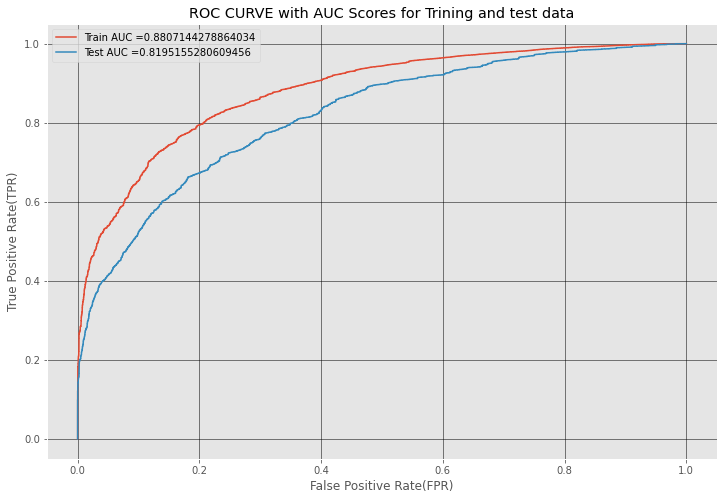

the maximum value of tpr*(1-fpr) 0.6369945712757281 for threshold 0.513
[[118751  23628]
 [ 14287  46184]]


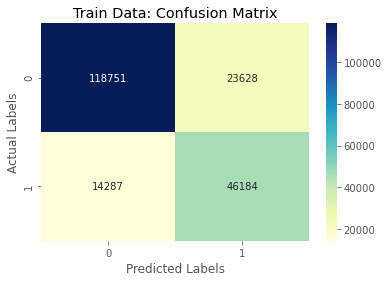

the maximum value of tpr*(1-fpr) 0.5460611471486463 for threshold 0.491
[[36929 11325]
 [ 7390 18406]]


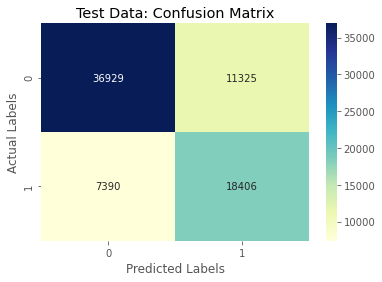

--------------classfication report for test data --------------------
              precision    recall  f1-score   support

           0       0.83      0.77      0.80     48254
           1       0.62      0.71      0.66     25796

    accuracy                           0.75     74050
   macro avg       0.73      0.74      0.73     74050
weighted avg       0.76      0.75      0.75     74050



In [61]:
plot_evaluations_graphs(rf_model, X_train_resample, X_test_resample, y_train_resample, y_test_resample)

In [76]:
print('best parameter grid :', rf_model.best_params_)
print('best score :',rf_model.best_score_)

best parameter grid : {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 50, 'n_estimators': 81}
best score : 0.8747795257067427


### Observations 
- Ensemble technique gives better result, we see better result for random forest classifier with roc_auc score of 0.81 on test data.
- Precision and recall for class 1 has been increased to 0.62 and 0.71 which better than previous two model results.

## Xgboost with HyperParameter Tuning

In [53]:
import xgboost 
# https://xgboost.readthedocs.io/en/stable/parameter.html
from sklearn.model_selection import RandomizedSearchCV

classifier = xgboost.XGBClassifier()
learning_rate = [0.01, 0.05, 0.10, 0.15, 0.20]
max_depth = [3, 4, 5, 6, 8, 10]
min_child_weight = [1, 3, 5, 7]
gamma = [0.0, 0.1, 0.2, 0.3, 0.4]
colsample_bytree = [0.0, 0.4, 0.5, 0.7]

param_grid = dict(learning_rate=learning_rate, max_depth=max_depth, min_child_weight=min_child_weight, gamma=gamma, colsample_bytree=colsample_bytree)
xgb_model=RandomizedSearchCV(classifier,param_distributions=param_grid,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
xgb_model.fit(X_train_resample, y_train_resample)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

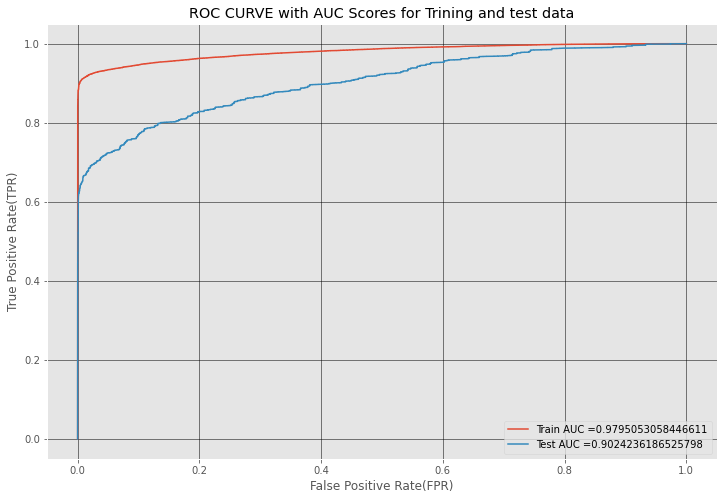

the maximum value of tpr*(1-fpr) 0.9048216193116875 for threshold 0.296
[[139822   2473]
 [  4668  54290]]


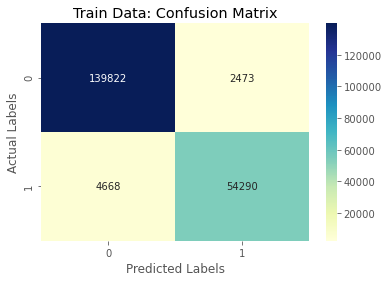

the maximum value of tpr*(1-fpr) 0.6984088193679023 for threshold 0.188
[[42937  5307]
 [ 5541 20199]]


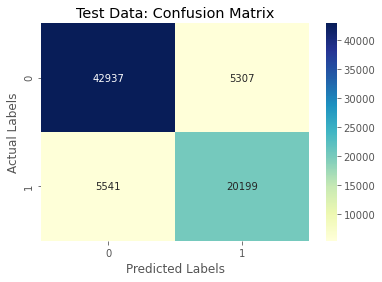

--------------classfication report for test data --------------------
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     48244
           1       0.79      0.78      0.79     25740

    accuracy                           0.85     73984
   macro avg       0.84      0.84      0.84     73984
weighted avg       0.85      0.85      0.85     73984



In [57]:
plot_evaluations_graphs(xgb_model, X_train_resample, X_test_resample, y_train_resample, y_test_resample)

In [59]:
print('best parameter grid :', xgb_model.best_params_)
print('best score :',xgb_model.best_score_)

best parameter grid : {'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.5}
best score : 0.9682948131581177


### Observations 
- The Xgboost outperformed compare to other three models with roc_auc score around 0.92 on test data
- We have best results on class 1 with Precision and recall of 0.85 and 0.79.

# Summary

In [12]:
from prettytable import PrettyTable
table = PrettyTable()

table.field_names =['No.','ML Model','Optimal Hyper Parameters','Train-AUC', 'Test-AUC']
table.add_row([1, 'Logistic Regression', logistic_reg_model.best_params_, 0.64, 0.62])
table.add_row([2, 'Decision Trees',dt_model.best_params_, 0.75, 0.70])
table.add_row([3, 'Random Forest',rf_model.best_params_, 0.88, 0.82])
table.add_row([4, 'Xgboost', xgb_model.best_params_, 0.98, 0.92])
print(table)

+-----+---------------------+------------------------------------------------------------------------------------------------------------+-----------+----------+
| No. |       ML Model      |                                          Optimal Hyper Parameters                                          | Train-AUC | Test-AUC |
+-----+---------------------+------------------------------------------------------------------------------------------------------------+-----------+----------+
|  1  | Logistic Regression |                               {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}                                |    0.64   |   0.62   |
|  2  |    Decision Trees   |          {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 125}           |    0.75   |   0.7    |
|  3  |    Random Forest    | {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 50, 'n_estimators': 81} |    0.88   |   0.82   |
|  4  |       Xgboost       